In [1]:
import sklearn
from sklearn import datasets
import pandas
import matplotlib.pyplot as plt
import seaborn


Bad key “backend in file /Users/guillermo/.matplotlib/matplotlibrc, line 1 ('“backend: TkAgg”')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


#### Mask the dataset creation for educational purposes (viewer: do not open)

In [2]:
data, labels = datasets.make_classification(n_samples=100,                                                                          n_features=5, n_classes=2, n_informative=3, n_redundant=0, n_repeated=0, random_state=7)

In [3]:
df_data = pandas.DataFrame(data, columns=['comms', 'remote access', 'weather', 'external partners', 'physical access'])
df_data.head()

,comms,remote access,weather,external partners,physical access
0,0.803228,-1.719388,-0.771794,-0.337491,2.766993
1,2.386229,0.432278,-0.261445,-1.076436,2.318828
2,-0.752438,-1.515338,0.461747,-0.901231,-1.188724
3,-0.753555,-1.179283,-0.940821,-0.670618,-1.288896
4,0.491539,-1.420062,-0.532363,0.502583,-0.419785


In [4]:
df_labels = pandas.DataFrame(labels, columns=['go/no-go criterion']) # go=0, no-go=1
df_labels.head()

,go/no-go criterion
0,1
1,1
2,0
3,0
4,1


In [5]:
dataset = pandas.concat([df_data, df_labels], axis=1)
dataset.head()

,comms,remote access,weather,external partners,physical access,go/no-go criterion
0,0.803228,-1.719388,-0.771794,-0.337491,2.766993,1
1,2.386229,0.432278,-0.261445,-1.076436,2.318828,1
2,-0.752438,-1.515338,0.461747,-0.901231,-1.188724,0
3,-0.753555,-1.179283,-0.940821,-0.670618,-1.288896,0
4,0.491539,-1.420062,-0.532363,0.502583,-0.419785,1


# Empirical Cumulative Distribution
> **run for-loop below for chart. Then read below**

The empirical cummative Distibution function (ECDF) displays our data as-is. That is, instead of bucket-tizing the data into similar bins based on a bin-range and placing them in a Histogram, the ECDF helps us visualize the raw data across its range of values. In our case below, we show the raw values for each feature. 

The way you can interpret this graph is by pointing to a value on the x-axis and trace your finger up the vertical y-axis until you hit a data point for a feature and say that the proportion of values less than that x-axis value is Y%. For example, in the chart below about 67% of the values for remote access are less than or equal to 0, whereas for all other features they are about 55%-to-60% less than or equal to 0. 

Another way you can interpret this data is -- notice, the external partners and weather distributions follow each other throughout their distributions. Remote access' distribution starts to follow external partners and weather distributions after 0.0; beforehand it's farthest from these two distributions. It seems that weather and external partners distributions share simliar "behavior," if you will, throughout their values. Whereas, remote access joins the party later. 

Along the same notion above, similar behavior is seen with comms and physical access distributions. This indicates that these two feature share simliar "behavior" if you will. 

[ECDF reference](https://towardsdatascience.com/what-why-and-how-to-read-empirical-cdf-123e2b922480) |
[ECDF reference](https://machinelearningmastery.com/empirical-distribution-function-in-python/) |
[Seaborn ecdfplot() reference](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html) 

Text(0.5, 1.0, 'Feature Analysis | Empirical Cumulative Distribution')

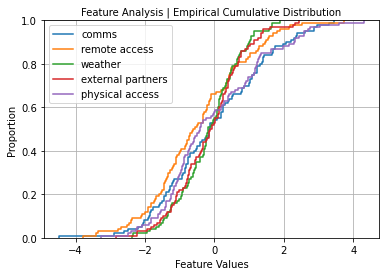

In [6]:
for feature in [*df_data]:  # unpack the column names in df_data via [*]
    axes = seaborn.ecdfplot(df_data[feature])
    axes.grid(True)

# set the plot's label
axes.set_xlabel('Feature Values', fontsize=10)
# set plot's legend labels
axes.legend([*df_data], fontsize=10)
# set plot's title
axes.set_title('Feature Analysis | Empirical Cumulative Distribution', fontsize=10)


# Kernel Density Estimation

Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. [reference](https://en.wikipedia.org/wiki/Kernel_density_estimation). 

My interpretation for what we see below is that it shows us there are 2 subsets within this dataset based on the distribution of the features. The lower 3 lines are one subset, whereas the red and green lines represent the other subset. We see that one set of lines follow or track closely to each other more than the other two lines. 

Further analyzing the lower 3 lines (i.e. features) we notice that the blue line (i.e. comms) deviates more relative to the other two in their distributions. In my mind there is more information to be gained from the blue line under the lens of these 3 features. 

I claim this shows that we definitely have at least 2 informative features in terms of distribution. Which one or ones are just noise?

Could we adjust the bandwidth (bw_adjust) in hopes to possibly highlight potential informative features? Play around with it to find it make a claim of none, one, or more informative features. More formally, this parameter controls the number of samples or window of samples used to estimate the probability for a new point. [reference](https://machinelearningmastery.com/probability-density-estimation/)

`Change the parameter bw_adjust to see its effect on the distribution`
[Seaborn kdeplot() reference](https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot)

Text(0.5, 1.0, 'Feature Analysis | Kernel Density Estimation')

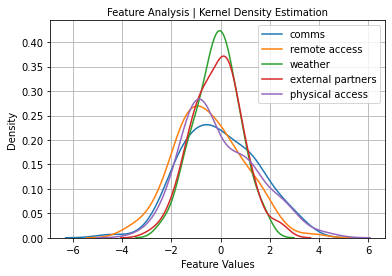

In [7]:
for feature in [*df_data]:  # unpack the column names in df_data via [*]
    axes = seaborn.kdeplot(df_data[feature], bw_adjust=1.0)  # bw_adjust is defaulted to 1.0
    axes.grid(True)

# set the plot's label
axes.set_xlabel('Feature Values', fontsize=10)
# set plot's legend labels
axes.legend([*df_data], fontsize=10)
# set plot's title
axes.set_title('Feature Analysis | Kernel Density Estimation', fontsize=10)

# Kernel Density Estimation Pair Plot

My favorite exploratory data analysis tactic! 

Along the diagnal, this tells us each feature's distribution relative to the go/no-go criterion. For example, the comms feature has two clear distributions; the blue hill represents the comms feature's contribution to go criterion examples, whereas the red hill represents its contributions to the no-go criterion. In my experience, the more distinct (or separated) the 2 hills are the better if we have 2 outcomes we are classifying (i.e. the go/no-go criterion). If we had 3 outcomes, such as "go," "no-go," and "standby," then it's better to see 3 separated distributions. 

Along the vertical, this tells us how one feature, paired with another feature, separates or distinguishes the go/no-go criterion. For example, under the comms column and remote access row, this tells informs us how well (or not) these two feaures do at distinguishing a go criterion (in blue) from no-go criterion (in orange). 

So in my experience, the more a pair of features can separate the classification indicates that these features are the more likely these to features will be informative to the ML model, and less likely noise within our dataset -- again, relative to the classification (e.g. go/no-go criterion). For example, we see that the comms feature, paired with other features, tends to do pretty well at separating the two classification. On the other hand, we see that the weather feature, regardless of pairing, struggles to separate the two classifications (e.g. go/no-go criterion).

I would consider the weather feature to be noise, and so, not really beneficial to our ML effort. Which other feature would you consider to be noise? Which features would you consider informative?

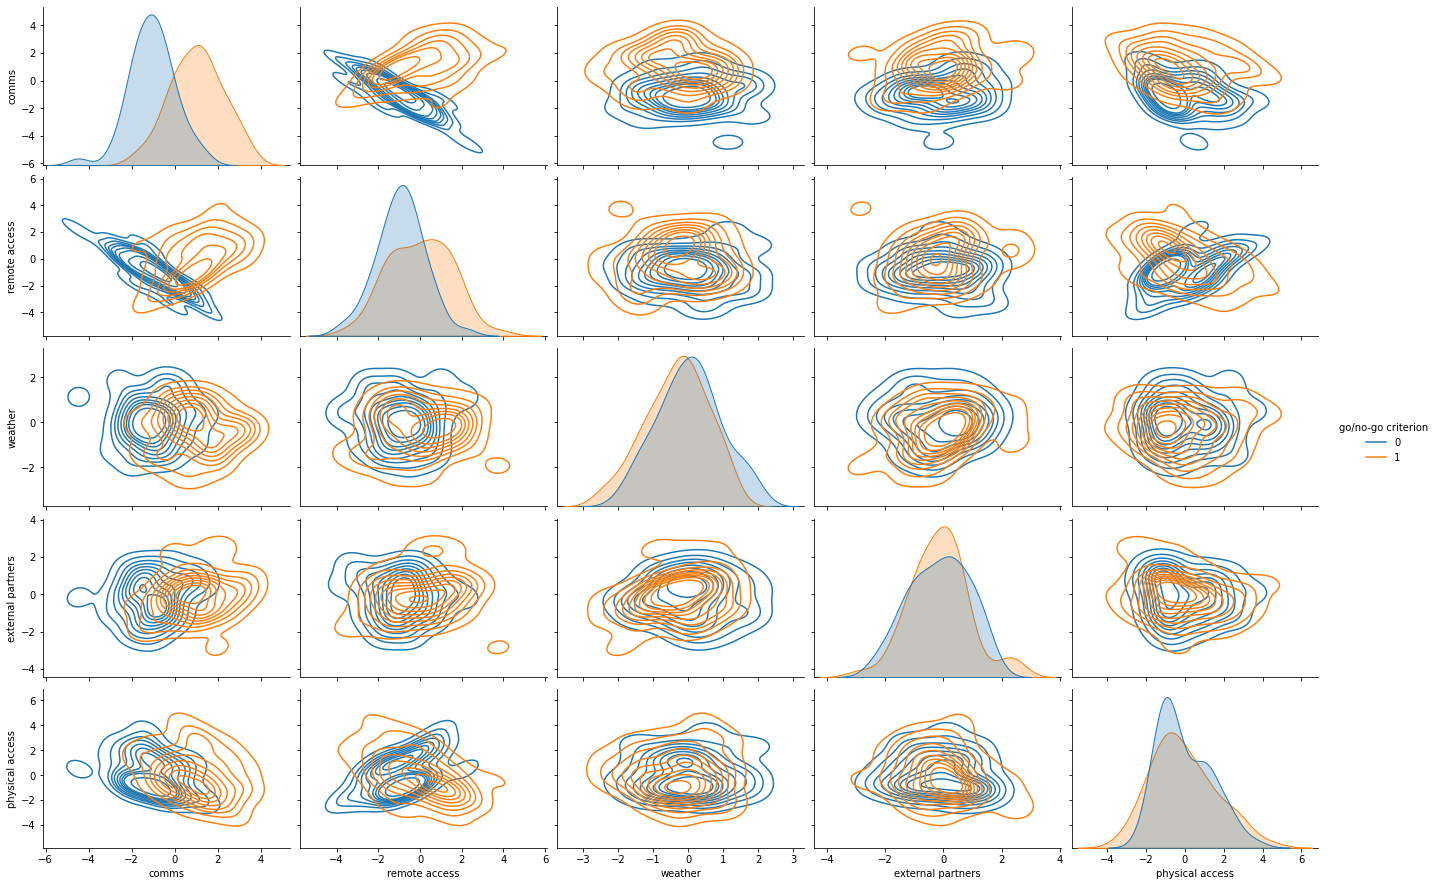

In [8]:
pairgrid = seaborn.pairplot(dataset, kind='kde', hue='go/no-go criterion', aspect=1.5)

# Viewing the Kernel Density Estimation (KDE) of all the observations

This is just for fun. I like to see a small number of observations and their KDE. Since there are only 100 observations I plot them all, but you have thousands or millions of observations in a dataset, so you wouldn't do this on all examples. 

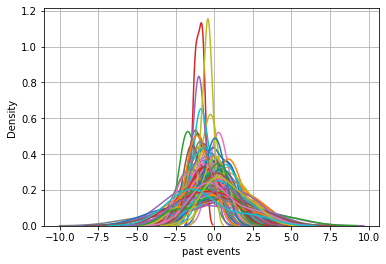

In [9]:
for data_row in range(0, 100): # range is done based on the amount of observations (i.e. rows) we have in our dataset
    axes = seaborn.kdeplot(df_data.iloc[data_row], bw_adjust=1.0)
    axes.set_xlabel('past events')
    axes.grid(True)

Play around with the bandwidth to smooth or un-smooth the distributions :) 

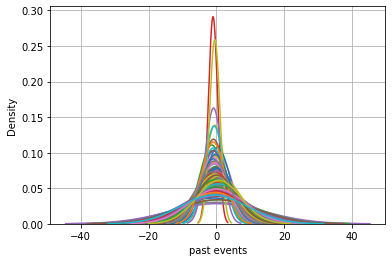

In [10]:
for data_row in range(0, 100): # range is done based on the amount of observations (i.e. rows) we have in our dataset
    axes = seaborn.kdeplot(df_data.iloc[data_row], bw_adjust=7.0)
    axes.set_xlabel('past events')
    axes.grid(True)

For funzies I few the ECD of the observations. This chart tell me nothing. Ha

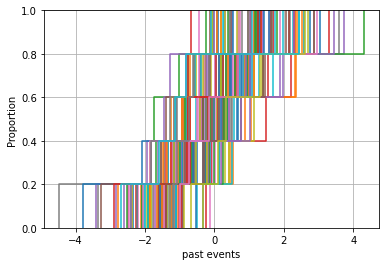

In [11]:
for sample in range(0, 100):  # range is done based on the amount of observations (i.e. rows) we have in our dataset
    axes = seaborn.ecdfplot(df_data.iloc[sample])
    axes.set_xlabel('past events')
    axes.grid(True)

# Now we jump to `feature-to-Model-Analysis-1` notebook!